# Importar
Correr todas las veces


## General


In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import fetch_openml
import pickle
import numpy as np
from sklearn.decomposition import PCA
%matplotlib inline
from collections import Counter
import seaborn as sns

## NeuralMap

In [22]:
!pip  install neural-map

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
from neural_map import NeuralMap, _plot


##UMAP

In [24]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import umap

## HDBSCAN

In [26]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

## Google Drive

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## tSNE

In [29]:
from sklearn.manifold import TSNE

# Carga de datos

In [30]:
mist_test = pd.read_csv('/content/drive/MyDrive/5to/sistemas_inteligentes/MIST-20-test.csv')


In [31]:
mist_train = pd.read_csv('/content/drive/MyDrive/5to/sistemas_inteligentes/MIST-20-train.csv')


In [32]:
mist_train.head()

Unnamed: 0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       36621     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1       28358     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2       35505     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3       23395     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4       59244     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel9  ...  pixel776  pixel777  pixel778  pixel779  pixel780  pixel781  \
0     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel782  pixel783  pixel784  digit  
0       0.0       0.0       0.0      0  
1       0.0       0.0       0.0      0  
2       0.0       0.0       0.0      0  
3       0.0       0.0       0.0      0  
4       0.0       0.0       0.0      0  

[5 rows x 786 columns]

## Normalización

In [33]:
# mist_train.columns = mist_train.columns.astype(str)
col_target = 'digit'
scaler = MinMaxScaler()
data = mist_train.drop(col_target, axis=1)
data = data.drop('Unnamed: 0', axis=1)
data = scaler.fit_transform(data)

¿Set unnamed as index?

# TRAIN **NO CORRER**

## NeuralMap


In [ ]:
# instanciación de la clase NeuralMap
som = NeuralMap(variables=data.shape[1], columns=20, rows=20, toroidal=True, metric='correlation')

In [ ]:
# entranemiento de la instancia
som.train(data=data, verbose=False)

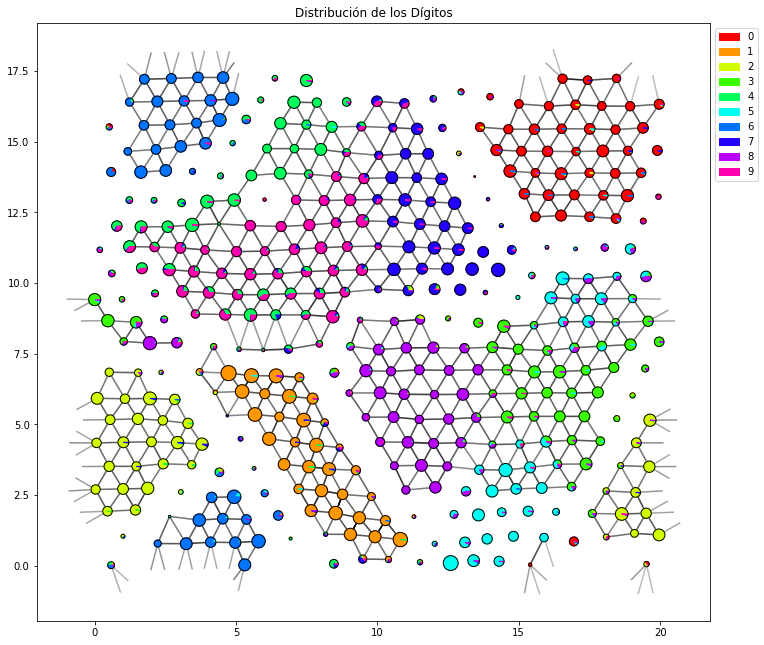

In [ ]:
som.plot_analysis(data, attached_values=mist_train[col_target].values, min_cluster_size=8, size=13, title='Distribución de los Dígitos')

### Guardar modelo


In [ ]:
som_20_dic = som.get_dict()

path = '/content/drive/MyDrive/5to/sistemas_inteligentes/som_20_dic_drop-unnamed.pickle'

with open(path, "wb") as f:
  pickle.dump(som_20_dic, f)

##UMAP

In [ ]:
umap_model = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=2,
    random_state=42,
).fit(data)


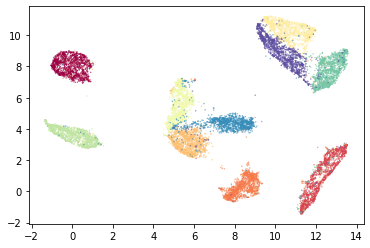

In [ ]:
plt.scatter(umap_model.embedding_[:, 0], umap_model.embedding_[:, 1],
            c=mist_train[col_target].values.astype(int), s=0.1, cmap='Spectral');

### Guardar modelo

In [ ]:
path = '/content/drive/MyDrive/5to/sistemas_inteligentes/umap_model_20.sav'

with open(path, "wb") as f:
  pickle.dump(umap_model, f)


## tSNE

In [ ]:
tsne_model = TSNE(
    n_components=2,
    learning_rate="auto",
    n_iter=500,
    random_state=0,
)

In [ ]:
%%time
tsne_proyection = tsne_model.fit_transform(data)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


CPU times: user 2min 32s, sys: 3.08 s, total: 2min 36s
Wall time: 1min 54s


[Text(0.5, 1.0, 'MNIST data T-SNE projection')]

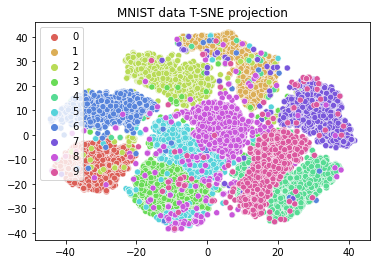

In [ ]:
sns.scatterplot(x=tsne_proyection[:,0], y=tsne_proyection[:,1], hue=mist_train[col_target].values,
                palette=sns.color_palette("hls", 10),
                data=data).set(title="MNIST data T-SNE projection")

### Guardar modelo


In [ ]:
path = '/content/drive/MyDrive/5to/sistemas_inteligentes/tsne_proyection_20.sav'

with open(path, "wb") as f:
  pickle.dump(tsne_proyection, f)

# Cargar instancias de modelos entrenados

## NeuralMap

In [34]:
path = '/content/drive/MyDrive/5to/sistemas_inteligentes/som_20_dic_drop-unnamed.pickle'
with open(path, 'rb') as f:
    som_20_dic = pickle.load(f)

In [35]:
som = NeuralMap(**som_20_dic)

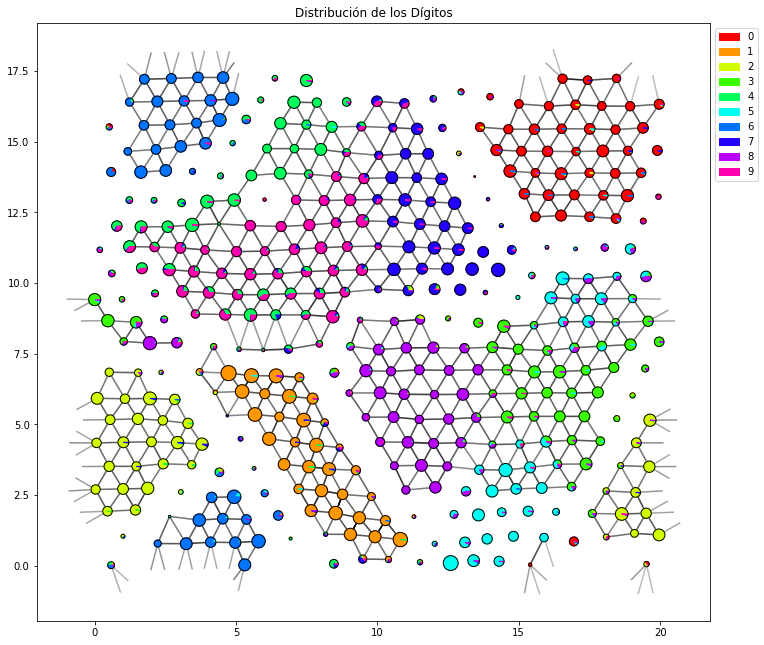

In [88]:
som.plot_analysis(data, attached_values=mist_train[col_target].values, min_cluster_size=8, size=13, title='Distribución de los Dígitos')

In [37]:
def get_nodes_of(self, data, attachments):
  output = pd.DataFrame(columns = ['node'])
  for ind, attachment in zip(data, attachments):
    output.loc[attachment] = [tuple(self.get_best_matching_unit(ind))]
  return output

In [38]:
nodes = get_nodes_of(som, data, attachments = mist_train.index)

## UMAP

In [39]:
path = '/content/drive/MyDrive/5to/sistemas_inteligentes/umap_model_20.sav'
with open(path, 'rb') as f:
    umap_model = pickle.load(f)


clusterable_embedding = umap_model.embedding_

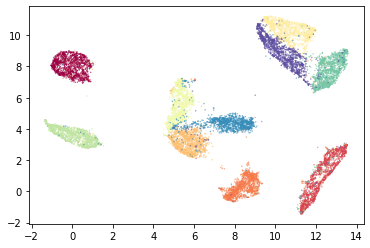

In [89]:
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
             c=mist_train[col_target].values, s=0.1, cmap='Spectral');

## tSNE

In [41]:
path = '/content/drive/MyDrive/5to/sistemas_inteligentes/tsne_proyection_20.sav'

with open(path, 'rb') as f:
    tsne_proyection = pickle.load(f)

In [42]:
from scipy import stats

clusterable_embedding_b = clusterable_embedding.ravel()
tsne_proyection_b = tsne_proyection.ravel()

dataset = pd.DataFrame()
dataset['col1'] = clusterable_embedding_b
dataset['col2'] = tsne_proyection_b

spear= stats.spearmanr(clusterable_embedding, tsne_proyection)

#dataset['col3'] = spear[0]
#dataset['col4'] = spear[1]
spear[0].shape

#print(dataset.head())


(4, 4)

# Clusterización

## Preprocesamiento

In [43]:
colors = ['#FF0000', '#FF9700', '#D1FF00', '#3AFF00', '#00FF5C', '#00FFF3', '#0074FF', '#2200FF', '#B900FF','#FF00AF']

In [44]:
evaluation_results = pd.DataFrame(columns = ['d_reduction_technique', 'clustering_algorithm', 'RI', 'AMI'])

### NeuralMap

#### Para evaluación numérica

In [45]:
cluster_evaluation_df = pd.DataFrame(columns = ['node', 'target', 'c_k_means', 'c_k_medoids', 'c_hdbscan'])

In [46]:
cluster_evaluation_df['node'] = nodes['node']
cluster_evaluation_df['target'] = mist_train[col_target]

#### Para evaluación gráfica

In [47]:
def most_frequent(List):
  if List:
    occurence_count = Counter(List)
    return occurence_count.most_common(1)[0][0]
  else:
    return


In [48]:
labels_digits = som.map_attachments(data, attachments=mist_train[col_target].values, aggregation_function=most_frequent)

In [49]:
i = 0
labels_target = np.full((labels_digits.shape[0], labels_digits.shape[1]), -10)
while i < labels_digits.shape[0]:
  j = 0
  while j < labels_digits.shape[1]:
    if labels_digits[i][j] is not None:
      labels_target[i][j] = labels_digits[i][j]
    j = j+1
  i = i+1


## HDBSCAN


### NeuralMap

#### Clusterización

In [50]:
som_hdbscan = som.hdbscan(min_cluster_size=5)


In [51]:
labels_hdbscan = som_hdbscan[0]
for node in np.unique(cluster_evaluation_df['node'].values):
   indexs = cluster_evaluation_df[cluster_evaluation_df['node'] == node].index
   for index in indexs:
     cluster_evaluation_df.loc[index, 'c_hdbscan'] = labels_hdbscan[node[0]][node[1]]

#### Evaluación

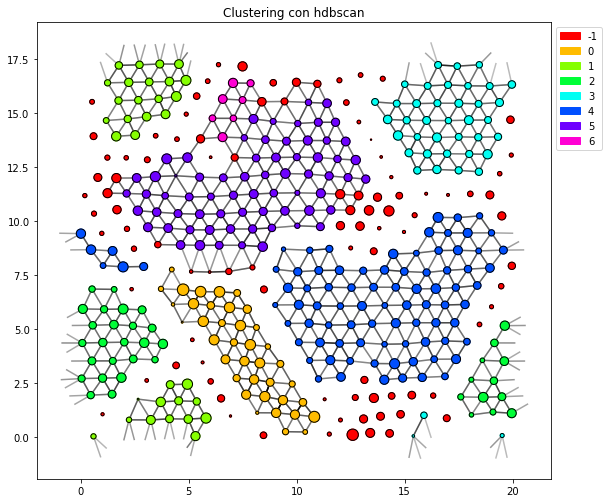

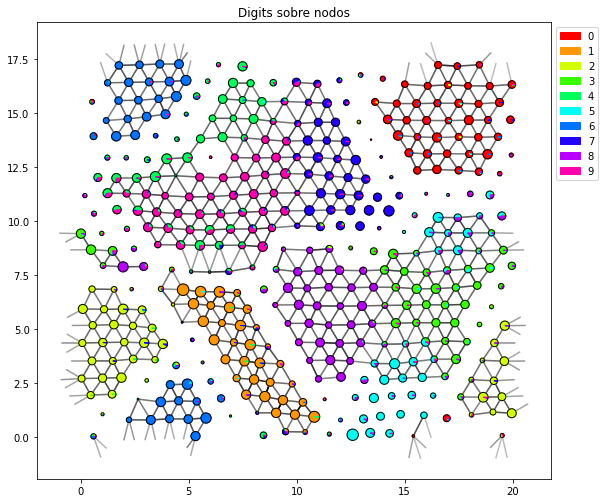

In [52]:
som.plot_analysis(data, attached_values=cluster_evaluation_df['c_hdbscan'].values, min_cluster_size=8, size=10, title='Clustering con hdbscan')
som.plot_analysis(data, attached_values=mist_train[col_target].values, min_cluster_size=8, size=10, title='Digits sobre nodos')

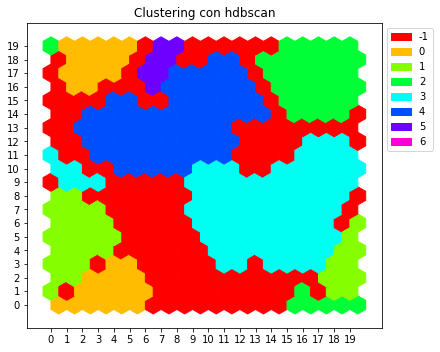

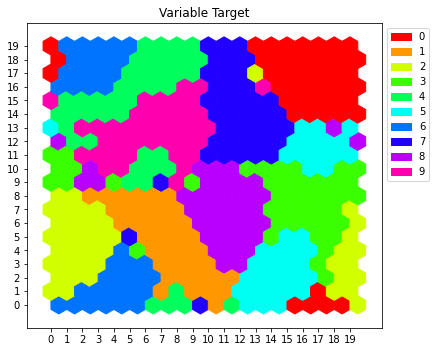

In [53]:
# clustered = (labels_hdbscan >= 0)
_plot.tiles(som.positions, 
         som.hexagonal, 
         labels_hdbscan, 
         norm=False, 
         title='Clustering con hdbscan', 
         labels=np.unique(labels_hdbscan),
         size=7)

_plot.tiles(som.positions, 
          som.hexagonal, 
          labels_target, 
          norm=False, 
          title='Variable Target', 
          labels=np.unique(labels_target),
          size=7)


In [54]:
evaluation = {'d_reduction_technique': 'neuralmap',
              'clustering_algorithm': 'hdbscan',
              'RI': adjusted_rand_score(cluster_evaluation_df['target'].values, cluster_evaluation_df['c_hdbscan'].values),
              'AMI': adjusted_mutual_info_score(cluster_evaluation_df['target'].values, cluster_evaluation_df['c_hdbscan'].values)
              }

evaluation_results = evaluation_results.append(evaluation, ignore_index = True)

### UMAP

#### Clusterización Train

In [55]:
hdbscan_umap = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
    prediction_data = True
).fit(clusterable_embedding)

In [56]:
hdbscan_labels = hdbscan_umap.labels_

In [57]:
path = '/content/drive/MyDrive/5to/sistemas_inteligentes/hdbscan_umap.pickle'

with open(path, "wb") as f:
  pickle.dump(hdbscan_umap, f)

#### Evaluación

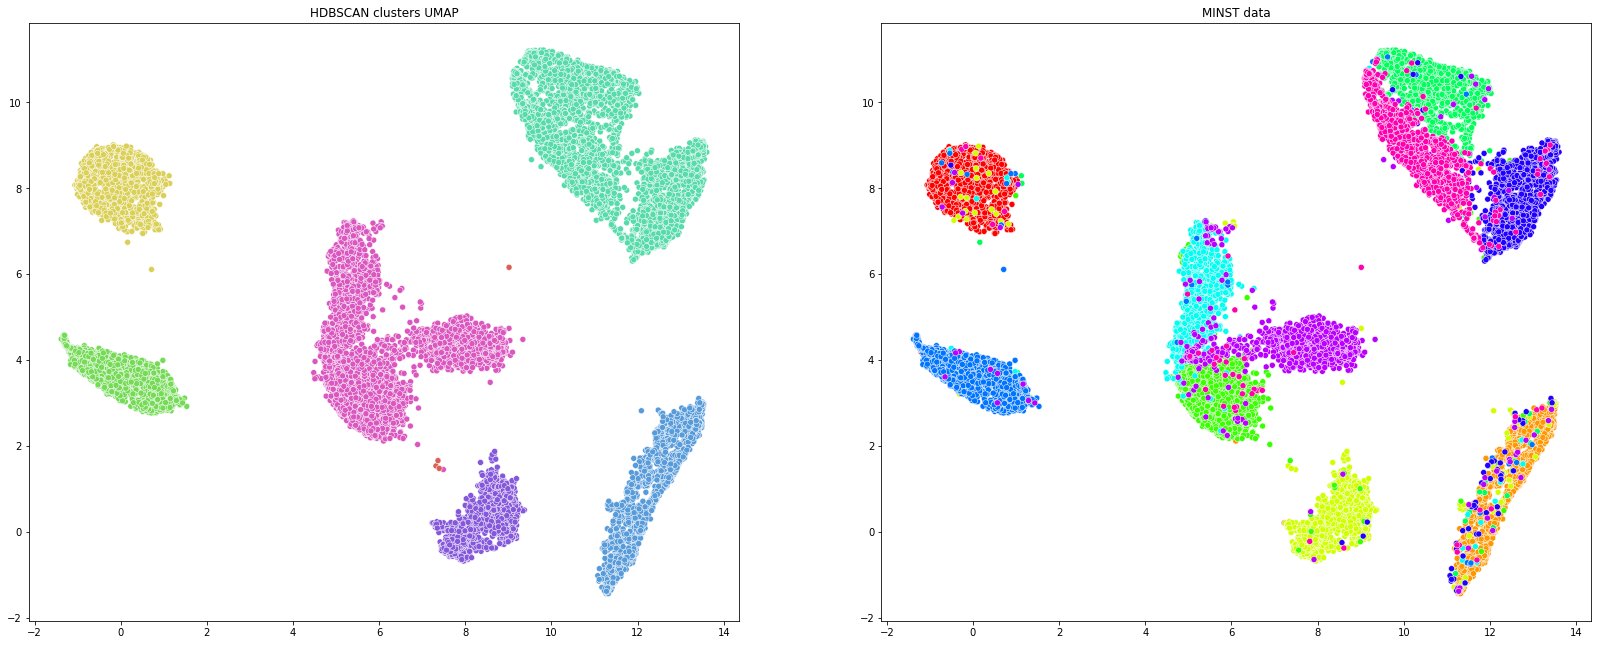

In [58]:
clustered = (hdbscan_labels >= 0)

f, ax = plt.subplots(1, 2, figsize=(28, 11))

sns.scatterplot(x=clusterable_embedding[:, 0], 
                y=clusterable_embedding[:, 1], 
                hue=hdbscan_labels,
                palette=sns.color_palette("hls", len(np.unique(hdbscan_labels))),
                data=data, ax=ax[0]).set(title="HDBSCAN clusters UMAP")

sns.scatterplot(x=clusterable_embedding[:, 0], 
                y=clusterable_embedding[:, 1], 
                hue=mist_train[col_target].values,
                palette=colors,
                data=data, ax=ax[1]).set(title="MINST data");


for ax in ax:
    ax.legend([],[], frameon=False)

plt.show()


In [59]:
evaluation = {'d_reduction_technique': 'umap',
              'clustering_algorithm': 'hdbscan',
              'RI': adjusted_rand_score(mist_train[col_target].values, hdbscan_labels),
              'AMI': adjusted_mutual_info_score(mist_train[col_target].values, hdbscan_labels)
              }
evaluation_results = evaluation_results.append(evaluation, ignore_index = True)


### tSNE

#### Clusterización


In [60]:
hdbscan_tsne = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
    prediction_data = True
).fit(tsne_proyection)

In [61]:
hdbscan_labels = hdbscan_tsne.labels_

path = '/content/drive/MyDrive/5to/sistemas_inteligentes/hdbscan_tsne.pickle'

with open(path, "wb") as f:
  pickle.dump(hdbscan_tsne, f)

#### Evaluación

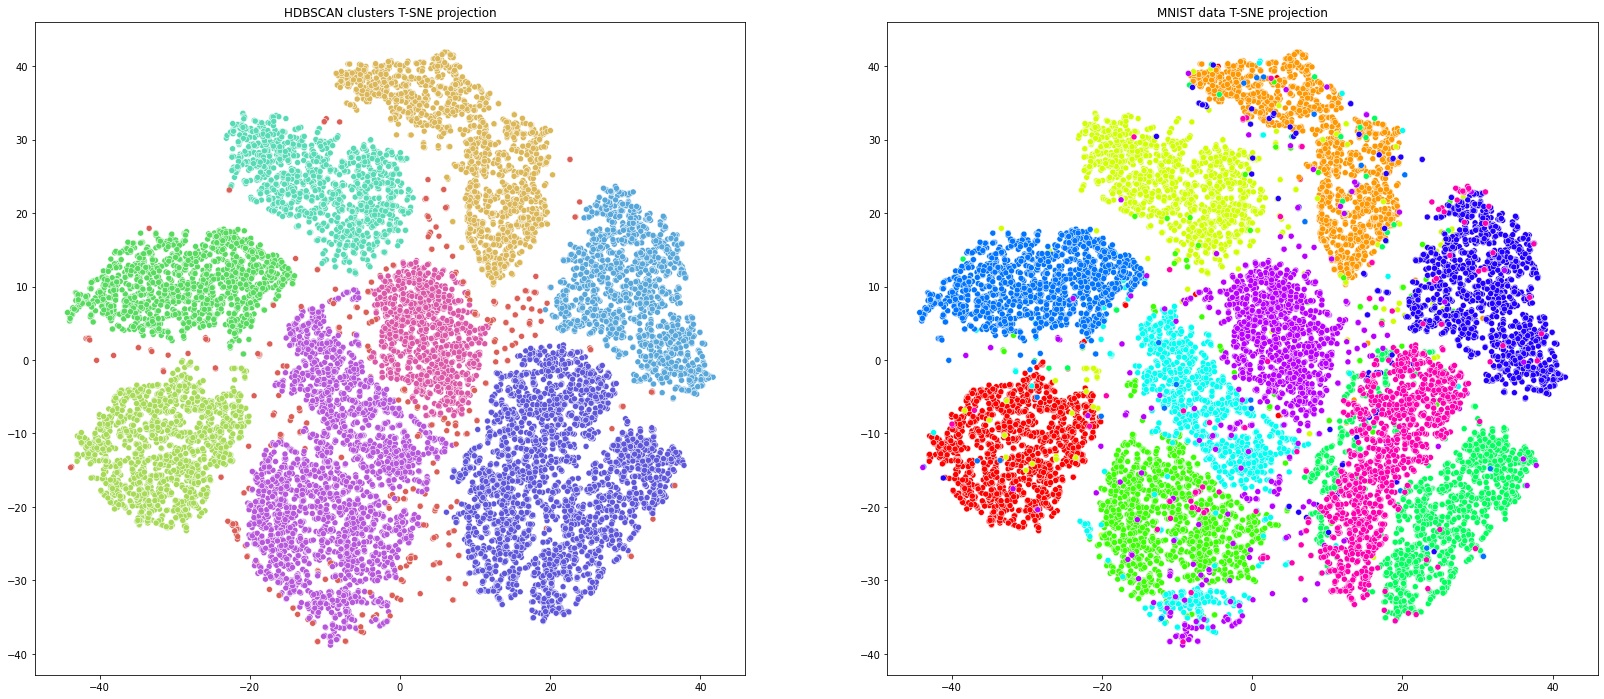

In [62]:
clustered = (hdbscan_labels >= 0)

f, ax = plt.subplots(1, 2, figsize=(28, 12))

sns.scatterplot(x=tsne_proyection[:,0], 
                y=tsne_proyection[:,1], 
                hue=hdbscan_labels,
                palette=sns.color_palette("hls", len(np.unique(hdbscan_labels))),
                data=data, ax=ax[0]).set(title="HDBSCAN clusters T-SNE projection")

sns.scatterplot(x=tsne_proyection[:,0], 
                y=tsne_proyection[:,1], 
                hue=mist_train[col_target].values,
                palette=colors,
                data=data, ax=ax[1]).set(title="MNIST data T-SNE projection")

for ax in ax:
    ax.legend([],[], frameon=False)

plt.show()


In [63]:
evaluation = {'d_reduction_technique': 'tsne',
              'clustering_algorithm': 'hdbscan',
              'RI': adjusted_rand_score(mist_train[col_target].values, hdbscan_labels),
              'AMI': adjusted_mutual_info_score(mist_train[col_target].values, hdbscan_labels)
              }
evaluation_results = evaluation_results.append(evaluation, ignore_index = True)

## KMeans


In [64]:
clusters = 10

### NeuralMap

#### Clusterización

In [65]:


labels_k_means, centers_k_means = som.k_means(clusters)


In [66]:
for node in np.unique(cluster_evaluation_df['node'].values):
   indexs = cluster_evaluation_df[cluster_evaluation_df['node'] == node].index
   for index in indexs:
     cluster_evaluation_df.loc[index, 'c_k_means'] = labels_k_means[node[0]][node[1]]

In [67]:
labels_k_medoids, centers_k_medoids = som.k_medoids(clusters)

In [68]:
for node in np.unique(cluster_evaluation_df['node'].values):
   indexs = cluster_evaluation_df[cluster_evaluation_df['node'] == node].index
   for index in indexs:
     cluster_evaluation_df.loc[index, 'c_k_medoids'] = labels_k_medoids[node[0]][node[1]]

#### Evaluación


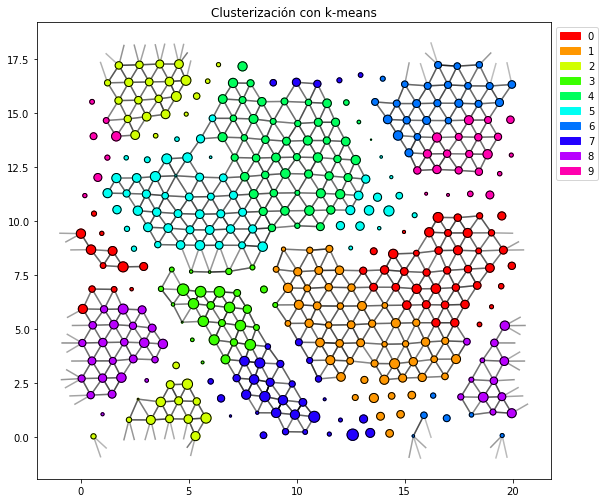

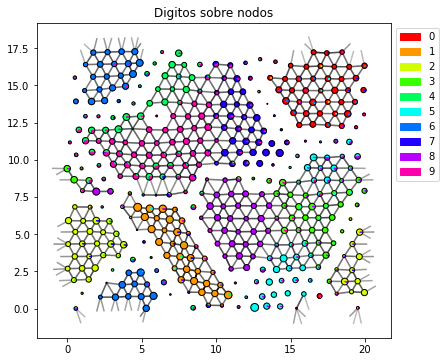

In [69]:
som.plot_analysis(data, attached_values=cluster_evaluation_df['c_k_means'].values, min_cluster_size=8, size=10, title='Clusterización con k-means')
som.plot_analysis(data, attached_values=mist_train[col_target].values, min_cluster_size=8, size=7, title='Digitos sobre nodos')

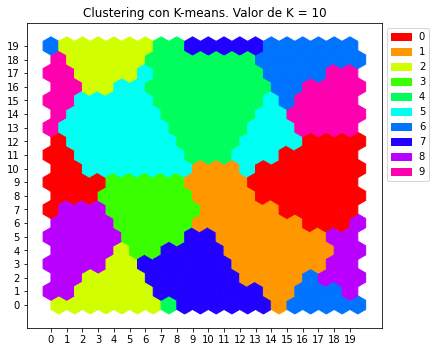

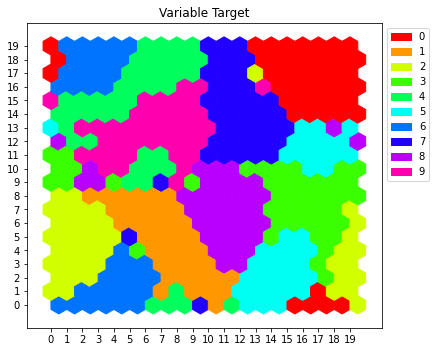

In [70]:

_plot.tiles(som.positions, 
         som.hexagonal, 
         labels_k_means, 
         norm=False, 
         title='Clustering con K-means. Valor de K = ' + str(clusters), 
         labels=list(range(clusters)),
         size=7)

_plot.tiles(som.positions, 
          som.hexagonal, 
          labels_target, 
          norm=False, 
          title='Variable Target', 
          labels=list(range(clusters)),
          size=7)


adjusted_rand_score([0, 0, 1, 1], [0, 0, 1, 1])
1.0

adjusted_rand_score([0, 0, 1, 1], [1, 1, 0, 0])
1.0

In [71]:
evaluation = {'d_reduction_technique': 'neuralmap',
              'clustering_algorithm': 'k-means',
              'RI': adjusted_rand_score(cluster_evaluation_df['target'].values, cluster_evaluation_df['c_k_means'].values),
              'AMI': adjusted_mutual_info_score(cluster_evaluation_df['target'].values, cluster_evaluation_df['c_k_means'].values)
              }
evaluation_results = evaluation_results.append(evaluation, ignore_index = True)

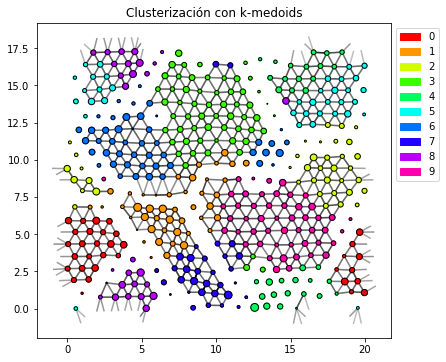

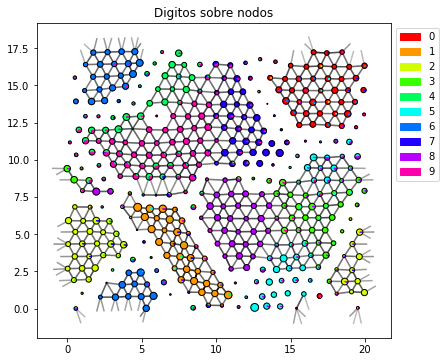

In [72]:
som.plot_analysis(data, attached_values=cluster_evaluation_df['c_k_medoids'].values, min_cluster_size=8, size=7, title='Clusterización con k-medoids')
som.plot_analysis(data, attached_values=mist_train[col_target].values, min_cluster_size=8, size=7, title='Digitos sobre nodos')

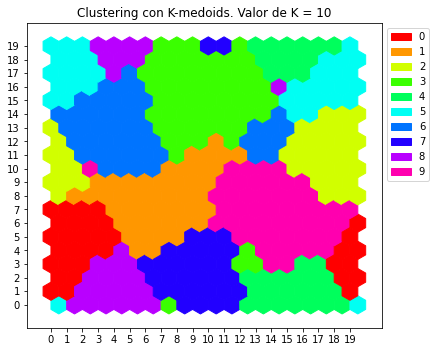

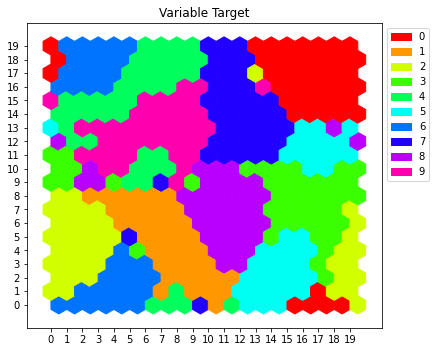

In [73]:

_plot.tiles(som.positions, 
         som.hexagonal, 
         labels_k_medoids, 
         norm=False, 
         title='Clustering con K-medoids. Valor de K = ' + str(clusters), 
         labels=list(range(clusters)),
         size=7)

_plot.tiles(som.positions, 
          som.hexagonal, 
          labels_target, 
          norm=False, 
          title='Variable Target', 
          labels=list(range(clusters)),
          size=7)

In [74]:
evaluation = {'d_reduction_technique': 'neuralmap',
              'clustering_algorithm': 'k-medoids',
              'RI': adjusted_rand_score(cluster_evaluation_df['target'].values, cluster_evaluation_df['c_k_medoids'].values),
              'AMI': adjusted_mutual_info_score(cluster_evaluation_df['target'].values, cluster_evaluation_df['c_k_medoids'].values)
              }

evaluation_results = evaluation_results.append(evaluation, ignore_index = True)

### UMAP

#### Clusterización

In [75]:
kmeans_umap = cluster.KMeans(n_clusters=clusters).fit(clusterable_embedding)

In [76]:
kmeans_labels = kmeans_umap.labels_

In [77]:
kmeans_umap = kmeans_labels

path = '/content/drive/MyDrive/5to/sistemas_inteligentes/kmeans_umap.pickle'

with open(path, "wb") as f:
  pickle.dump(kmeans_umap, f)

#### Evaluación

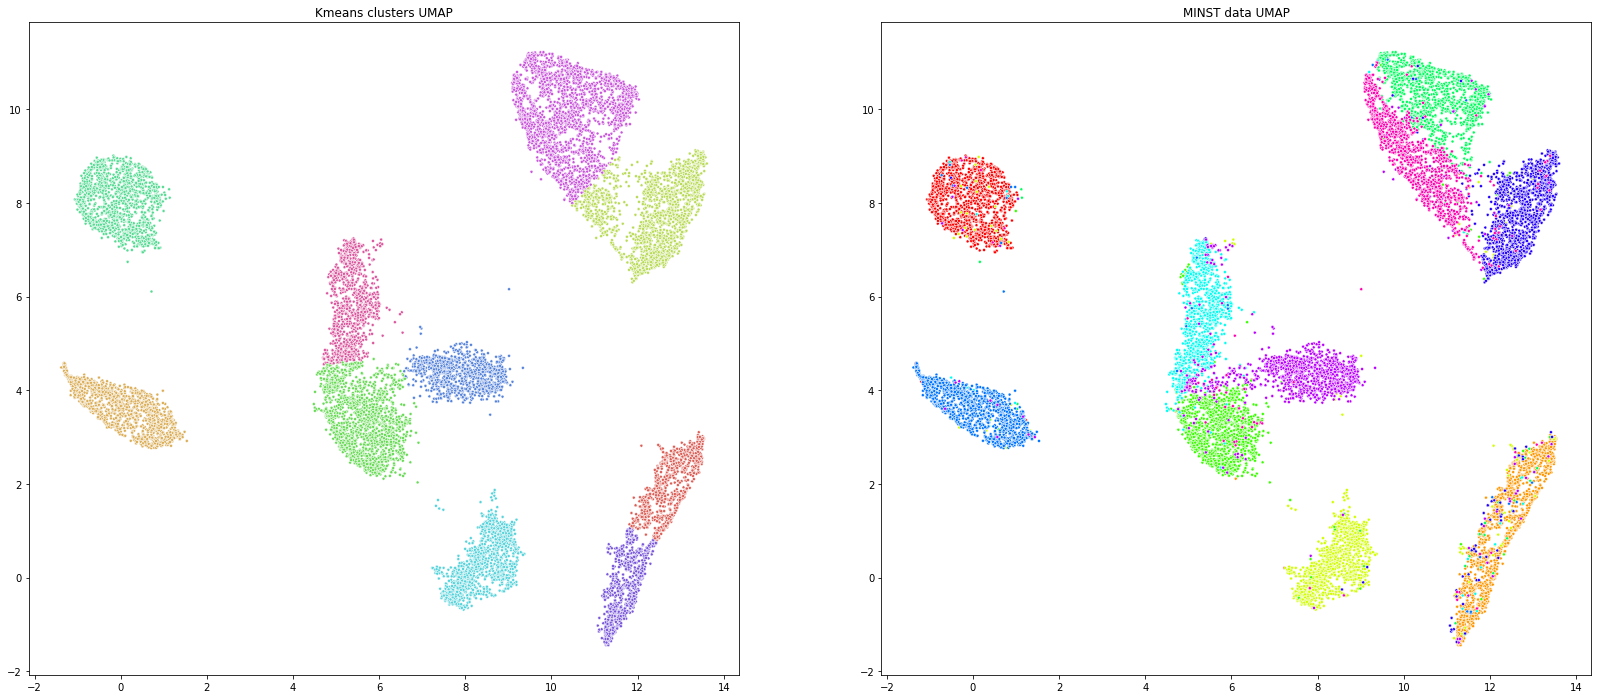

In [78]:

clustered = (kmeans_labels >= 0)

f, ax = plt.subplots(1, 2, figsize=(28, 12))

sns.scatterplot(x=clusterable_embedding[:, 0], 
                y=clusterable_embedding[:, 1], 
                hue=kmeans_labels,
                palette=sns.color_palette("hls", len(np.unique(kmeans_labels))),
                data=data, ax=ax[0],
                marker='.').set(title="Kmeans clusters UMAP")

sns.scatterplot(x=clusterable_embedding[:, 0], 
                y=clusterable_embedding[:, 1], 
                hue=mist_train[col_target].values,
                palette=colors,
                data=data, ax=ax[1],
                marker='.').set(title="MINST data UMAP");

for ax in ax:
    ax.legend([],[], frameon=False)

plt.show()



In [79]:
evaluation = {'d_reduction_technique': 'umap',
              'clustering_algorithm': 'k-means',
              'RI': adjusted_rand_score(mist_train[col_target].values, kmeans_labels),
              'AMI': adjusted_mutual_info_score(mist_train[col_target].values, kmeans_labels)
              }
evaluation_results = evaluation_results.append(evaluation, ignore_index = True)


### tSNE

#### Clusterización

In [80]:
kmeans_labels = cluster.KMeans(n_clusters=clusters).fit_predict(tsne_proyection)

In [81]:
kmeans_tsne = kmeans_labels

path = '/content/drive/MyDrive/5to/sistemas_inteligentes/kmeans_tsne.pickle'

with open(path, "wb") as f:
  pickle.dump(kmeans_tsne, f)

#### Evaluación

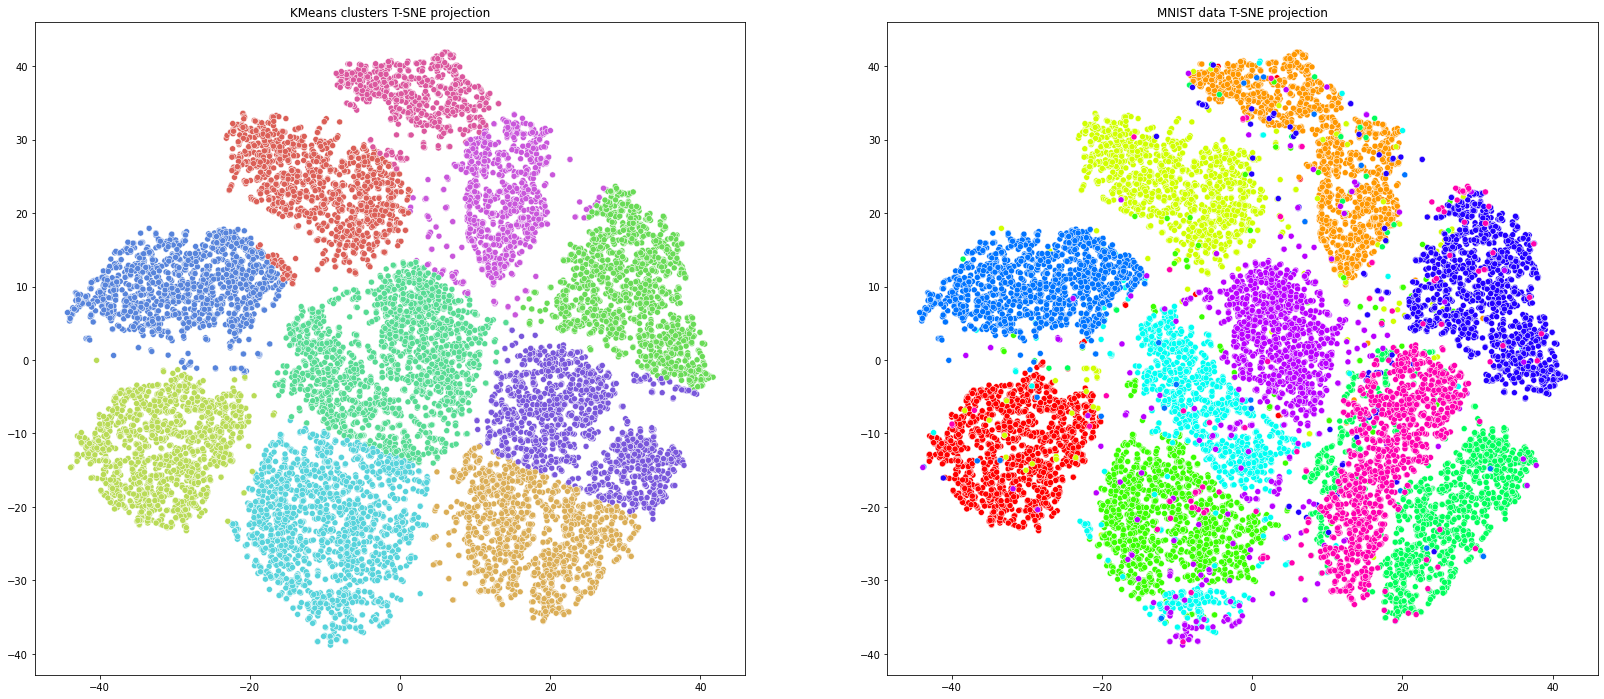

In [82]:
clustered = (kmeans_labels >= 0)

f, ax = plt.subplots(1, 2, figsize=(28, 12))

sns.scatterplot(x=tsne_proyection[:,0], 
                y=tsne_proyection[:,1], 
                hue=kmeans_labels,
                palette=sns.color_palette("hls", len(np.unique(kmeans_labels))),
                data=data, ax=ax[0]).set(title="KMeans clusters T-SNE projection")

sns.scatterplot(x=tsne_proyection[:,0], 
                y=tsne_proyection[:,1], 
                hue=mist_train[col_target].values,
                palette=colors,
                data=data, ax=ax[1]).set(title="MNIST data T-SNE projection")

for ax in ax:
    ax.legend([],[], frameon=False)


plt.show()

In [83]:
evaluation = {'d_reduction_technique': 'tsne',
              'clustering_algorithm': 'k-means',
              'RI': adjusted_rand_score(mist_train[col_target].values, kmeans_labels),
              'AMI': adjusted_mutual_info_score(mist_train[col_target].values, kmeans_labels)
              }
evaluation_results = evaluation_results.append(evaluation, ignore_index = True)

## Resultados

In [84]:
evaluation_results

d_reduction_technique clustering_algorithm        RI       AMI
0             neuralmap              hdbscan  0.483380  0.634203
1                  umap              hdbscan  0.533149  0.747335
2                  tsne              hdbscan  0.717804  0.806355
3             neuralmap              k-means  0.427269  0.571170
4             neuralmap            k-medoids  0.363183  0.521945
5                  umap              k-means  0.716458  0.796084
6                  tsne              k-means  0.642069  0.738372

In [85]:
path = '/content/drive/MyDrive/5to/sistemas_inteligentes/results_clustering_compare_mist_20.sav'

with open(path, "wb") as f:
  pickle.dump(evaluation_results, f)

In [86]:
path = '/content/drive/MyDrive/5to/sistemas_inteligentes/results_clustering_compare_mist_20.sav'

with open(path, 'rb') as f:
    result = pickle.load(f)

result

d_reduction_technique clustering_algorithm        RI       AMI
0             neuralmap              hdbscan  0.483380  0.634203
1                  umap              hdbscan  0.533149  0.747335
2                  tsne              hdbscan  0.717804  0.806355
3             neuralmap              k-means  0.427269  0.571170
4             neuralmap            k-medoids  0.363183  0.521945
5                  umap              k-means  0.716458  0.796084
6                  tsne              k-means  0.642069  0.738372

# Nuevos datos

In [ ]:
evaluation_predict_results = pd.DataFrame(columns = ['dr_technique', 'clustering_algorithm', 'RI', 'AMI'])

In [ ]:
i = 0
test = pd.DataFrame(columns= mist_test.columns)
test
while i <= 9:
  this_i = mist_test[mist_test['digit'] == i].sample(frac = 0.25)
  test = pd.concat([test, this_i])
  i = i+1


In [ ]:
mist_test_14k = test
mist_test_14k

Unnamed: 0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
20889      26117     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
40070      50081     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
23586      29469     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
28918      36143     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
37827      47324     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...          ...     ...     ...     ...     ...     ...     ...     ...   
37495      46909     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
40565      50698     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
11022      13791     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
11138      13945     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
38217      47788     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel8  pixel9  ...  pixel776  pixel777  pixel778  pixel779  pixel780  \
20889     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0   
40070     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0   
23586     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0   
28918     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0   
37827     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0   
...       ...     ...  ...       ...       ...       ...       ...       ...   
37495     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0   
40565     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0   
11022     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0   
11138     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0   
38217     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0   

       pixel781  pixel782  pixel783  pixel784  digit  
20889       0.0       0.0       0.0       0.0      0  
40070       0.0       0.0       0.0       0.0      0  
23586       0.0       0.0       0.0       0.0      0  
28918       0.0       0.0       0.0       0.0      0  
37827       0.0       0.0       0.0       0.0      0  
...         ...       ...       ...       ...    ...  
37495       0.0       0.0       0.0       0.0      9  
40565       0.0       0.0       0.0       0.0      9  
11022       0.0       0.0       0.0       0.0      9  
11138       0.0       0.0       0.0       0.0      9  
38217       0.0       0.0       0.0       0.0      9  

[13999 rows x 786 columns]

In [ ]:
# scaler = MinMaxScaler()
data_test = mist_test_14k.drop(col_target, axis=1)
data_test = data_test.drop('Unnamed: 0', axis=1)
data_test = scaler.fit_transform(data_test)

## UMAP

In [ ]:
new_embedding_umap = umap_model.transform(data_test)


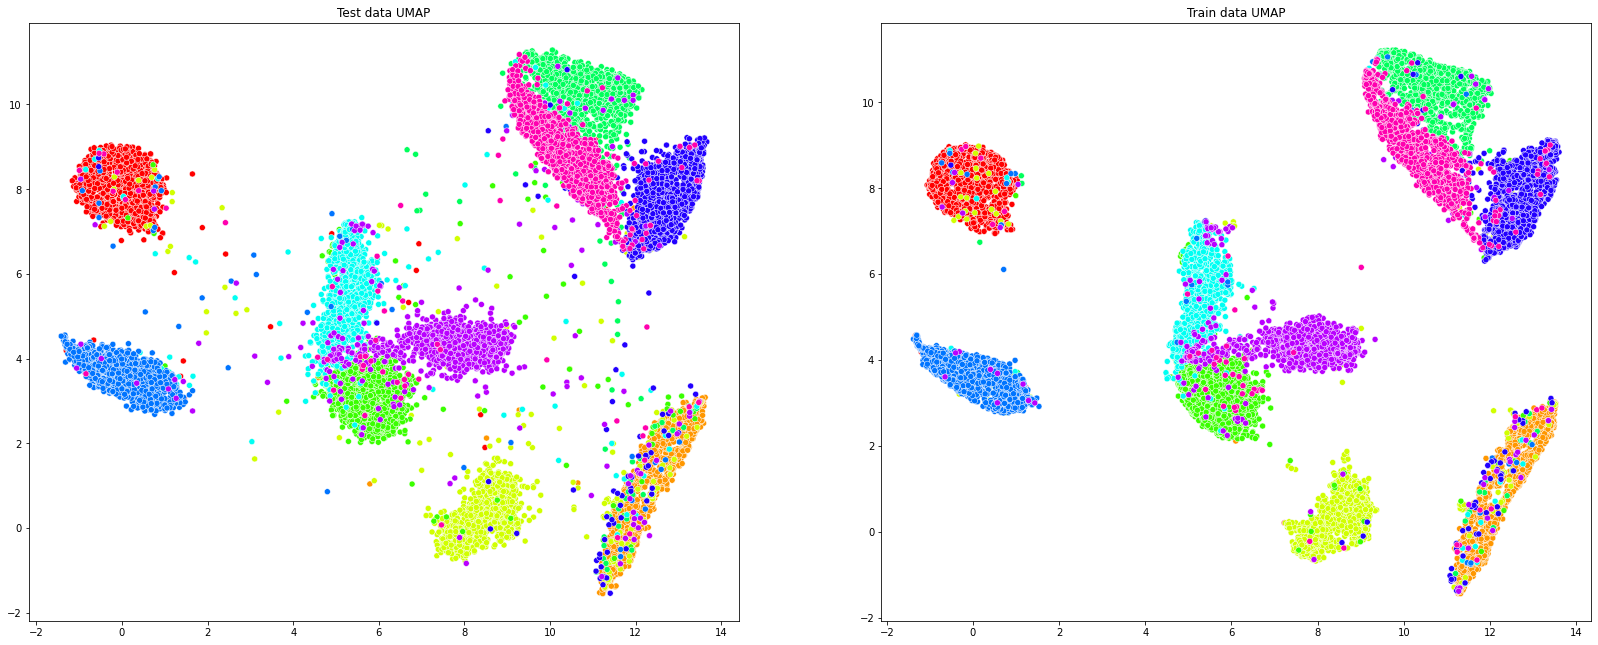

In [ ]:
# clustered = (hdbscan_labels >= 0)

# f = plt.figure(figsize=(20, 8))
# ax = f.add_subplot(121)
# ax2 = f.add_subplot(122)

# ax.scatter(new_embedding_umap[:, 0], new_embedding_umap[:, 1],
#             c=mist_test_14k[col_target].values.astype(int), s=0.1, cmap='Spectral');

# ax2.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
#             c=mist_train[col_target].values, s=0.1, cmap='Spectral');

clustered = (hdbscan_labels >= 0)

f, ax = plt.subplots(1, 2, figsize=(28, 11))

sns.scatterplot(x=new_embedding_umap[:, 0], 
                y=new_embedding_umap[:, 1], 
                hue=mist_test_14k[col_target].values,
                palette=colors,
                data=data_test, ax=ax[0]).set(title="Test data UMAP")

sns.scatterplot(x=clusterable_embedding[:, 0], 
                y=clusterable_embedding[:, 1], 
                hue=mist_train[col_target].values,
                palette=colors,
                data=data, ax=ax[1]).set(title="Train data UMAP");


for ax in ax:
    ax.legend([],[], frameon=False)

plt.show()


In [ ]:
new_embedding_umap

array([[-0.7654369 ,  8.304566  ],
       [ 0.5250708 ,  8.210848  ],
       [ 0.37402657,  8.186677  ],
       ...,
       [11.397142  ,  7.813804  ],
       [10.976124  ,  7.5330925 ],
       [10.635406  ,  8.307794  ]], dtype=float32)

### HDBSCAN

In [ ]:
new_hdbscan_labels = hdbscan.approximate_predict(hdbscan_umap, new_embedding_umap)

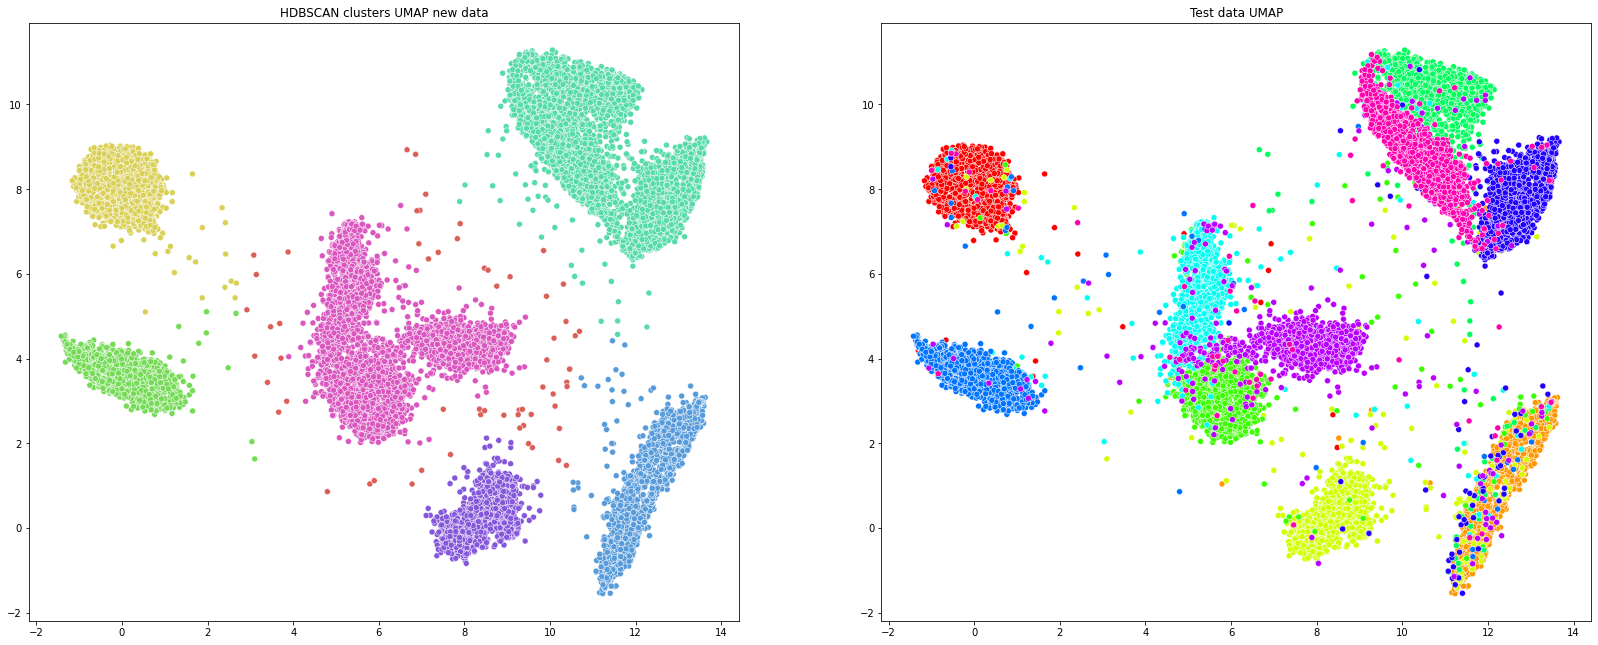

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(28, 11))

sns.scatterplot(x=new_embedding_umap[:, 0], 
                y=new_embedding_umap[:, 1], 
                hue=new_hdbscan_labels[0],
                palette=sns.color_palette("hls", len(np.unique(new_hdbscan_labels[0]))),
                data=data_test, ax=ax[0]).set(title="HDBSCAN clusters UMAP new data")

sns.scatterplot(x=new_embedding_umap[:, 0], 
                y=new_embedding_umap[:, 1], 
                hue=mist_test_14k[col_target].values,
                palette=colors,
                data=data_test, ax=ax[1]).set(title="Test data UMAP")


for ax in ax:
    ax.legend([],[], frameon=False)

plt.show()

In [ ]:
evaluation = {'dr_technique': 'umap',
              'clustering_algorithm': 'hdbscan',
              'RI': adjusted_rand_score(mist_test_14k[col_target].values, new_hdbscan_labels[0]),
              'AMI': adjusted_mutual_info_score(mist_test_14k[col_target].values, new_hdbscan_labels[0])
              }
evaluation_predict_results = evaluation_predict_results.append(evaluation, ignore_index = True)

### K-means

In [ ]:
new_kmeans_labels = kmeans_umap.predict(new_embedding_umap)

AttributeError: ignored

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(28, 11))

sns.scatterplot(x=new_embedding_umap[:, 0], 
                y=new_embedding_umap[:, 1], 
                hue=new_kmeans_labels,
                palette=sns.color_palette("hls", len(np.unique(new_kmeans_labels))),
                data=data_test, ax=ax[0]).set(title="HDBSCAN clusters UMAP new data")

sns.scatterplot(x=new_embedding_umap[:, 0], 
                y=new_embedding_umap[:, 1], 
                hue=mist_test_14k[col_target].values,
                palette=colors,
                data=data_test, ax=ax[1]).set(title="Test data UMAP")


for ax in ax:
    ax.legend([],[], frameon=False)

plt.show()

In [ ]:
evaluation = {'dr_technique': 'umap',
              'clustering_algorithm': 'k-means',
              'RI': adjusted_rand_score(mist_test_14k[col_target].values, new_kmeans_labels),
              'AMI': adjusted_mutual_info_score(mist_test_14k[col_target].values, new_kmeans_labels)
              }
evaluation_predict_results = evaluation_predict_results.append(evaluation, ignore_index = True)

## NeuralMap

In [ ]:
predict_evaluation_df = pd.DataFrame(columns = ['target', 'c_hdbscan_bm', 'c_kmeans_bm'])

ri = mist_test_14k.reset_index()
predict_evaluation_df['target'] = ri[col_target]

### Modelo clasificador

In [ ]:

def get_nodes(self):
  node_list = []
  c = 0
  while c < self.columns:
    r = 0
    while r < self.rows:
      node_list.append((r,c))
      r = r+1
    c = c+1
  return node_list


In [ ]:
def transform_c(self, data_test):
  path = '/content/drive/MyDrive/5to/sistemas_inteligentes/model_classification_71.pickle'
  with open(path, "rb") as f:
    model = pickle.load(f)
  new_embedding_np = model.predict(data_test)
  arr=[]
  arrGrande=[]
  for i_dato in new_embedding_np:
    for x in i_dato:
      if round(x)<=0:
        arr.append(0)
      else:
        arr.append(1)
    arrGrande.append(arr)
    arr=[]
  arr = np.array(arrGrande)
  a= pd.DataFrame(arr, columns= get_nodes(self))
  s1 = a.idxmax(axis=1)
  return s1


In [ ]:
new_embedding_np = transform_c(som, data_test)

In [ ]:
new_embedding_np

0          (0, 0)
1         (0, 17)
2        (18, 15)
3         (17, 0)
4        (15, 19)
           ...   
13994      (0, 0)
13995      (0, 0)
13996     (16, 9)
13997     (16, 7)
13998     (14, 7)
Length: 13999, dtype: object

In [ ]:


predict_evaluation_df = pd.concat([predict_evaluation_df, pd.DataFrame(new_embedding_np)], axis=1, ignore_index=True)
predict_evaluation_df = predict_evaluation_df.rename(columns = {0:'target', 1:'node_predict_c'})
predict_evaluation_df

target node_predict_c    2         3
0          0            NaN  NaN    (0, 0)
1          0            NaN  NaN   (0, 17)
2          0            NaN  NaN  (18, 15)
3          0            NaN  NaN   (17, 0)
4          0            NaN  NaN  (15, 19)
...      ...            ...  ...       ...
13994      9            NaN  NaN    (0, 0)
13995      9            NaN  NaN    (0, 0)
13996      9            NaN  NaN   (16, 9)
13997      9            NaN  NaN   (16, 7)
13998      9            NaN  NaN   (14, 7)

[13999 rows x 4 columns]

In [ ]:
for node in np.unique(predict_evaluation_df['node_predict_c'].values):
  indexs = predict_evaluation_df[predict_evaluation_df['node_predict_c'] == node].index
  for index in indexs:
    predict_evaluation_df.loc[index, 'target_predict_c'] = labels_digits[node[0]][node[1]]

#labels_digit viene el preprocesamiento para la clusterización

In [ ]:
#tengo un nodo que me esta retornando nan en la parte de clusterización, ver por qué
predict_evaluation_df.isna().value_counts()

target  node_predict_c  2     3    
False   True            True  False    13999
dtype: int64

In [ ]:
som.plot_analysis(data_test, attached_values=predict_evaluation_df['target_predict_c'].values, min_cluster_size=8, size=10, title='Predict values clasificador')
som.plot_analysis(data, attached_values=mist_train[col_target].values, min_cluster_size=8, size=10, title='Digitos sobre nodos')

KeyError: ignored

### Función best matching

In [ ]:
def transform_bm(som):
  nodes_p=[]
  for ind in data_test:
    nodes_p.append(som.get_best_matching_unit(ind))
  return pd.Series(data=nodes_p)
  

In [ ]:
new_embedding_np = pd.DataFrame(transform_bm(som), columns=['nodes_bm'])

In [ ]:
predict_evaluation_df['node_predict_bm'] = new_embedding_np

In [ ]:
for node in np.unique(predict_evaluation_df['node_predict_bm'].values):
  indexs = predict_evaluation_df[predict_evaluation_df['node_predict_bm'] == node].index
  for index in indexs:
    predict_evaluation_df.loc[index, 'target_predict_bm'] = labels_digits[node[0]][node[1]]

In [ ]:
som.plot_analysis(data_test, attached_values=predict_evaluation_df['target_predict_bm'].values, min_cluster_size=8, size=10, title='Predict values best matching')
som.plot_analysis(data, attached_values=mist_train[col_target].values, min_cluster_size=8, size=10, title='Digitos sobre nodos')

In [ ]:
predict_evaluation_df

In [ ]:
hdbscan_labels = som_hdbscan[0]
for node in np.unique(predict_evaluation_df['node_predict_bm'].values):
   indexs = predict_evaluation_df[predict_evaluation_df['node_predict_bm'] == node].index
   for index in indexs:
     predict_evaluation_df.loc[index, 'c_hdbscan_bm'] = hdbscan_labels[node[0]][node[1]]

In [ ]:
evaluation = {'dr_technique': 'neuralmap',
              'clustering_algorithm': 'hdbscan',
              'RI': adjusted_rand_score(predict_evaluation_df['target'], predict_evaluation_df['c_hdbscan_bm']),
              'AMI': adjusted_mutual_info_score(predict_evaluation_df['target'], predict_evaluation_df['c_hdbscan_bm'])
              }
evaluation_predict_results = evaluation_predict_results.append(evaluation, ignore_index = True)

In [ ]:
for node in np.unique(predict_evaluation_df['node_predict_bm'].values):
   indexs = predict_evaluation_df[predict_evaluation_df['node_predict_bm'] == node].index
   for index in indexs:
     predict_evaluation_df.loc[index, 'c_kmeans_bm'] = labels_k_means[node[0]][node[1]]

In [ ]:
evaluation = {'dr_technique': 'neuralmap',
              'clustering_algorithm': 'kmeans',
              'RI': adjusted_rand_score(predict_evaluation_df['target'], predict_evaluation_df['c_kmeans_bm']),
              'AMI': adjusted_mutual_info_score(predict_evaluation_df['target'], predict_evaluation_df['c_kmeans_bm'])
              }
evaluation_predict_results = evaluation_predict_results.append(evaluation, ignore_index = True)

In [ ]:
predict_evaluation_df

In [ ]:
evaluation_predict_results